### Prophet 사용

In [1]:
!pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/7e/da/408e50ad8ce7dbca81d126377e57897784025647b719534f3529c4b71a9c/prophet-1.1.4-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 8.6 MB/s eta 0:00:00
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/97/43/303bc017c708734bd8a7a75b2130ebf1d582320d732174d6e359ea163b4b/holidays-0.30-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/25/d4/592f53ce2f8dde8be5720851bd0ab71cc2e76c55978e4163ef1ab7e389bb/importlib_resources-6.0.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 71.4 MB/s eta 0:00:00m eta 0:00:010:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/d6/54/a8759957b778094233d7058c8ddbe368504b448ffe9c26a85f7bfd53584e/plotly-5.16.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 64.6 MB/s eta 0:00:00m eta 0:00:010:01:01


In [1]:
from prophet import Prophet
import pandas as pd
import copy
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [22]:
train.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [3]:
train = train.rename(columns={
    '건물번호': 'building_number',
    '일시': 'ds',
    '기온(C)': 'temperature',
    '강수량(mm)': 'precipitation',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'y'
})

In [4]:
test = test.rename(columns={
    '건물번호': 'building_number',
    '일시': 'ds',
    '기온(C)': 'temperature',
    '강수량(mm)': 'precipitation',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity'
})

In [144]:
train['ds'] = pd.to_datetime(train['ds'], format='%Y%m%d %H')

In [145]:
train.head()

,num_date_time,building_number,ds,temperature,precipitation,windspeed,humidity,sunshine,solar_radiation,y
0,1_20220601 00,1,2022-06-01 00:00:00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,2022-06-01 01:00:00,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,2022-06-01 02:00:00,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,2022-06-01 03:00:00,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,2022-06-01 04:00:00,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [13]:
ts_train = train[['date_time','power_consumption']]

In [14]:
ts_train.head()

,date_time,power_consumption
0,2022-06-01 00:00:00,1085.28
1,2022-06-01 01:00:00,1047.36
2,2022-06-01 02:00:00,974.88
3,2022-06-01 03:00:00,953.76
4,2022-06-01 04:00:00,986.40


In [ ]:
ds_sep = dict()
datasets = dict()

for i in t:
    datasets['train'] = train_bt[train_bt['building_type']==i].drop(['building_number', 'building_type'], axis=1).reset_index(drop=True)
    datasets['test'] = test_bt[test_bt['building_type']==i].drop(['building_number', 'building_type'], axis=1).reset_index(drop=True)
    datasets['test_index'] = test_bt[test_bt['building_type']==i].drop(['building_number', 'building_type'], axis=1).index
    ds_sep[i] = copy.deepcopy(datasets)

In [35]:
datasets = list()

for i in range(0, 100):
    datasets.append(train[train['building_number']==i+1][['ds','y']].reset_index(drop=True))

In [36]:
datasets[0]

,ds,y
0,2022-06-01 00:00:00,1085.28
1,2022-06-01 01:00:00,1047.36
2,2022-06-01 02:00:00,974.88
3,2022-06-01 03:00:00,953.76
4,2022-06-01 04:00:00,986.40
...,...,...
2035,2022-08-24 19:00:00,2517.12
2036,2022-08-24 20:00:00,2208.96
2037,2022-08-24 21:00:00,1806.24
2038,2022-08-24 22:00:00,1387.20


In [18]:
ts_train = ts_train.rename(columns={
    'date_time': 'ds',
    'power_consumption': 'y'
})

In [39]:
models = [0 for i in range(0, 100)]

In [42]:
for i in range(0, 100):
    model = Prophet()
    model.fit(datasets[i])
    models[i] = copy.deepcopy(model)

07:22:12 - cmdstanpy - INFO - Chain [1] start processing
07:22:12 - cmdstanpy - INFO - Chain [1] done processing
07:22:12 - cmdstanpy - INFO - Chain [1] start processing
07:22:13 - cmdstanpy - INFO - Chain [1] done processing
07:22:13 - cmdstanpy - INFO - Chain [1] start processing
07:22:13 - cmdstanpy - INFO - Chain [1] done processing
07:22:13 - cmdstanpy - INFO - Chain [1] start processing
07:22:13 - cmdstanpy - INFO - Chain [1] done processing
07:22:13 - cmdstanpy - INFO - Chain [1] start processing
07:22:13 - cmdstanpy - INFO - Chain [1] done processing
07:22:13 - cmdstanpy - INFO - Chain [1] start processing
07:22:13 - cmdstanpy - INFO - Chain [1] done processing
07:22:13 - cmdstanpy - INFO - Chain [1] start processing
07:22:13 - cmdstanpy - INFO - Chain [1] done processing
07:22:13 - cmdstanpy - INFO - Chain [1] start processing
07:22:14 - cmdstanpy - INFO - Chain [1] done processing
07:22:14 - cmdstanpy - INFO - Chain [1] start processing
07:22:14 - cmdstanpy - INFO - Chain [1]

In [63]:
future = models[0].make_future_dataframe(periods=7*24, freq='H')
future.tail(10)

,ds
2198,2022-08-31 14:00:00
2199,2022-08-31 15:00:00
2200,2022-08-31 16:00:00
2201,2022-08-31 17:00:00
2202,2022-08-31 18:00:00
2203,2022-08-31 19:00:00
2204,2022-08-31 20:00:00
2205,2022-08-31 21:00:00
2206,2022-08-31 22:00:00
2207,2022-08-31 23:00:00


In [50]:
datasets[0].tail()

,ds,y
2035,2022-08-24 19:00:00,2517.12
2036,2022-08-24 20:00:00,2208.96
2037,2022-08-24 21:00:00,1806.24
2038,2022-08-24 22:00:00,1387.20
2039,2022-08-24 23:00:00,1925.28


In [71]:
futures = list()

for i in range(0, 100):
    future = models[i].make_future_dataframe(periods=7*24, freq='H')
    forecast = models[i].predict(future)
    futures.append(copy.deepcopy(forecast[-7*24:]['yhat']))

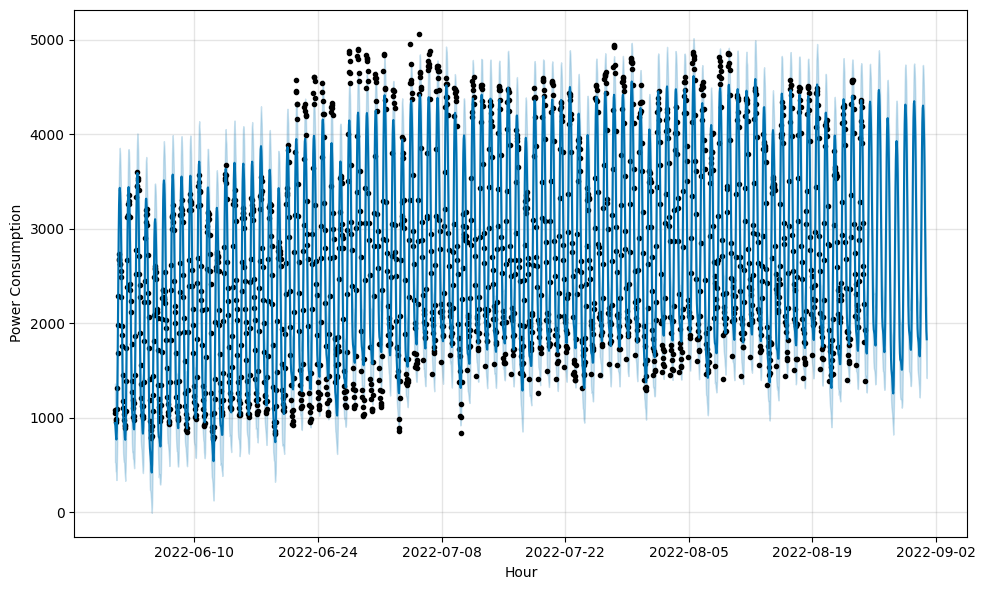

In [66]:
models[0].plot(forecast, xlabel='Hour', ylabel='Power Consumption')
plt.show()

In [76]:
import itertools
import numpy as np

ans = list(itertools.chain(*futures))

In [77]:
ans = np.round(ans, 2)

In [78]:
ans[:5]

array([1857.57, 1825.63, 1766.17, 1698.83, 1679.12])

In [80]:
sub = pd.read_csv('sample_submission.csv')
sub['answer'] = ans
sub.to_csv('prophet_sub_13.csv', index=False)

# Neural Prophet

In [81]:
!pip install neuralprophet

  Obtaining dependency information for neuralprophet from https://files.pythonhosted.org/packages/63/5a/69f7dce6733d2fad2c1557894d53db167c1563068571a88554eedfef6f66/neuralprophet-0.6.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.2/378.2 kB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 9.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 72.5 MB/s eta 0:00:00
  Obtaining dependency information for tensorboard<3.0.0,>=2.11.2 from https://files.pythonhosted.org/packages/bc/a2/ff5f4c299eb37c95299a76015da3f30211468e29d8d6f1d011683279baee/tensorboard-2.14.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 74.1 MB/s eta 0:00:00
  Obtaining dependency inform

In [2]:
from neuralprophet import NeuralProphet, set_log_level
import plotly.express as px
set_log_level("ERROR")

/opt/conda/lib/python3.10/site-packages/plotly_resampler/aggregation/aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


In [3]:
from neuralprophet import set_random_seed

set_random_seed(41)

In [4]:
train = pd.read_csv('train_bt.csv')
test = pd.read_csv('test_bt.csv')

In [3]:
train_ohe = pd.read_csv('train_ohe.csv')
test_ohe = pd.read_csv('test_ohe.csv')

In [149]:
train.head()

,building_number,date_time,temperature,precipitation,windspeed,humidity,power_consumption,building_type,total_area,cooling_area,solar_power,ess,pcs
0,1,2022-06-01 00:00:00,18.6,NaN,0.9,42.0,1085.28,Other,110634.0,39570.0,0,0,0
1,1,2022-06-01 01:00:00,18.0,NaN,1.1,45.0,1047.36,Other,110634.0,39570.0,0,0,0
2,1,2022-06-01 02:00:00,17.7,NaN,1.5,45.0,974.88,Other,110634.0,39570.0,0,0,0
3,1,2022-06-01 03:00:00,16.7,NaN,1.4,48.0,953.76,Other,110634.0,39570.0,0,0,0
4,1,2022-06-01 04:00:00,18.4,NaN,2.8,43.0,986.40,Other,110634.0,39570.0,0,0,0


In [5]:
train.drop(['precipitation', 'total_area', 'cooling_area'], axis=1, inplace=True)
test.drop(['precipitation', 'total_area', 'cooling_area'], axis=1, inplace=True)

In [6]:
replace_dict = {
    'Other': 0,
    'Public': 1,
    'University': 2,
    'Data_Center': 3,
    'Department_Store_and_Outlet': 4,
    'Hospital': 5,
    'Commercial': 6,
    'Apartment': 7,
    'Laboratory': 8,
    'Knowledge_Industry_Center': 9,
    'Discount_Mart': 10,
    'Hotel_and_Resort': 11
}

In [7]:
train['building_type'] = train['building_type'].replace(replace_dict)
test['building_type'] = test['building_type'].replace(replace_dict)

In [11]:
train.head()

,building_number,date_time,temperature,windspeed,humidity,power_consumption,building_type,solar_power,ess,pcs
0,1,2022-06-01 00:00:00,18.6,0.9,42.0,1085.28,0,0,0,0
1,1,2022-06-01 01:00:00,18.0,1.1,45.0,1047.36,0,0,0,0
2,1,2022-06-01 02:00:00,17.7,1.5,45.0,974.88,0,0,0,0
3,1,2022-06-01 03:00:00,16.7,1.4,48.0,953.76,0,0,0,0
4,1,2022-06-01 04:00:00,18.4,2.8,43.0,986.40,0,0,0,0


In [156]:
train_ohe.head()

,building_number,ds,temperature,windspeed,humidity,y,total_area,cooling_area,solar_power,ess,...,building_type_Data_Center,building_type_Department_Store_and_Outlet,building_type_Discount_Mart,building_type_Hospital,building_type_Hotel_and_Resort,building_type_Knowledge_Industry_Center,building_type_Laboratory,building_type_Other,building_type_Public,building_type_University
0,1,2022-06-01 00:00:00,18.6,0.9,42.0,1085.28,110634.0,39570.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,2022-06-01 01:00:00,18.0,1.1,45.0,1047.36,110634.0,39570.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,2022-06-01 02:00:00,17.7,1.5,45.0,974.88,110634.0,39570.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,2022-06-01 03:00:00,16.7,1.4,48.0,953.76,110634.0,39570.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2022-06-01 04:00:00,18.4,2.8,43.0,986.40,110634.0,39570.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [91]:
test_ohe.head()

,building_number,date_time,temperature,windspeed,humidity,total_area,cooling_area,solar_power,ess,pcs,...,building_type_Data_Center,building_type_Department_Store_and_Outlet,building_type_Discount_Mart,building_type_Hospital,building_type_Hotel_and_Resort,building_type_Knowledge_Industry_Center,building_type_Laboratory,building_type_Other,building_type_Public,building_type_University
0,1,2022-08-25 00:00:00,23.5,2.2,72,110634.0,39570.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,2022-08-25 01:00:00,23.0,0.9,72,110634.0,39570.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,2022-08-25 02:00:00,22.7,1.5,75,110634.0,39570.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,2022-08-25 03:00:00,22.1,1.3,78,110634.0,39570.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2022-08-25 04:00:00,21.8,1.0,77,110634.0,39570.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
train_ohe = train_ohe.rename(columns={
    'date_time': 'ds',
    'power_consumption': 'y'
})

NameError: name 'train_ohe' is not defined

In [9]:
test_ohe = test_ohe.rename(columns={
    'date_time': 'ds'
})

NameError: name 'test_ohe' is not defined

In [98]:
train_ohe.columns

Index(['building_number', 'ds', 'temperature', 'windspeed', 'humidity', 'y',
       'total_area', 'cooling_area', 'solar_power', 'ess', 'pcs',
       'building_type_Apartment', 'building_type_Commercial',
       'building_type_Data_Center',
       'building_type_Department_Store_and_Outlet',
       'building_type_Discount_Mart', 'building_type_Hospital',
       'building_type_Hotel_and_Resort',
       'building_type_Knowledge_Industry_Center', 'building_type_Laboratory',
       'building_type_Other', 'building_type_Public',
       'building_type_University'],
      dtype='object')

In [158]:
train.columns

Index(['building_number', 'date_time', 'temperature', 'windspeed', 'humidity',
       'power_consumption', 'building_type', 'solar_power', 'ess', 'pcs'],
      dtype='object')

In [10]:
col_lst = ['temperature', 'windspeed', 'humidity']

In [12]:
datasets = list()
test_datasets = list()
for i in range(0, 100):
    ds_and_y = train[train['building_number']==i+1].drop(['building_number','building_type','solar_power','ess','pcs'], axis=1).reset_index(drop=True)
    test_ds_and_y = test[test['building_number']==i+1].drop(['building_number','building_type','solar_power','ess','pcs'], axis=1).reset_index(drop=True)
    datasets.append(ds_and_y)
    test_datasets.append(test_ds_and_y)

In [11]:
train = train.rename(columns={
    'date_time': 'ds',
    'power_consumption': 'y'
})

test = test.rename(columns={
    'date_time': 'ds'
})

In [13]:
datasets[0].head()

,ds,temperature,windspeed,humidity,y
0,2022-06-01 00:00:00,18.6,0.9,42.0,1085.28
1,2022-06-01 01:00:00,18.0,1.1,45.0,1047.36
2,2022-06-01 02:00:00,17.7,1.5,45.0,974.88
3,2022-06-01 03:00:00,16.7,1.4,48.0,953.76
4,2022-06-01 04:00:00,18.4,2.8,43.0,986.40


In [14]:
np_models = [0 for i in range(0, 100)]

In [15]:
for i in range(0, 100):
    set_random_seed(41)
    globals()[f'np_model_{i}'] = NeuralProphet(
        n_forecasts=7*24, # 24 * 7 = 7일이 된다
        n_lags=7*24,        # 7 * 24 = 1일, 현재 변수가 얼마 뒤의 예측변수에 영향을 미칠지 설정
        weekly_seasonality=True,
        daily_seasonality=True,
        #d_hidden=128,       # 은닉층 뉴런 설정
        learning_rate=1e-3,  # 학습률
        batch_size=64,
        epochs=200,
        
    )

    # 독립 변수 추가 및 정규화
    globals()[f'np_model_{i}'].add_lagged_regressor(names=col_lst)
    
    globals()[f'np_model_{i}'].fit(datasets[i], freq='h')
    np_models[i] = globals()[f'np_model_{i}']

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

In [16]:
np_models[0]

In [81]:
df_future = np_models[0].make_future_dataframe(datasets[0], periods=3)

In [84]:
df_future.head()

,ds,temperature,windspeed,humidity,y,solar_power,ess,pcs,building_type_Apartment,building_type_Commercial,building_type_Data_Center,building_type_Department_Store_and_Outlet,building_type_Discount_Mart,building_type_Hospital,building_type_Hotel_and_Resort,building_type_Knowledge_Industry_Center,building_type_Laboratory,building_type_Other,building_type_Public,building_type_University
0,2022-08-18 00:00:00,24.1,2.1,78.0,1898.88,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2022-08-18 01:00:00,23.4,2.2,82.0,1804.80,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2022-08-18 02:00:00,23.1,2.0,84.0,1626.72,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2022-08-18 03:00:00,23.2,1.9,84.0,1565.28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2022-08-18 04:00:00,22.7,2.1,87.0,1584.48,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [86]:
datasets[0][datasets[0]['ds']<'2022-08-25'].tail()

,ds,temperature,windspeed,humidity,y,solar_power,ess,pcs,building_type_Apartment,building_type_Commercial,building_type_Data_Center,building_type_Department_Store_and_Outlet,building_type_Discount_Mart,building_type_Hospital,building_type_Hotel_and_Resort,building_type_Knowledge_Industry_Center,building_type_Laboratory,building_type_Other,building_type_Public,building_type_University
2035,2022-08-24 19:00:00,25.5,2.9,63.0,2517.12,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2036,2022-08-24 20:00:00,25.0,2.6,66.0,2208.96,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2037,2022-08-24 21:00:00,24.6,1.3,67.0,1806.24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2038,2022-08-24 22:00:00,24.1,2.1,70.0,1387.20,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2039,2022-08-24 23:00:00,23.8,1.4,70.0,1925.28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [91]:
datasets[0].head()

,ds,temperature,windspeed,humidity,y,solar_power,ess,pcs,building_type_Apartment,building_type_Commercial,building_type_Data_Center,building_type_Department_Store_and_Outlet,building_type_Discount_Mart,building_type_Hospital,building_type_Hotel_and_Resort,building_type_Knowledge_Industry_Center,building_type_Laboratory,building_type_Other,building_type_Public,building_type_University
0,2022-06-01 00:00:00,18.6,0.9,42.0,1085.28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2022-06-01 01:00:00,18.0,1.1,45.0,1047.36,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2022-06-01 02:00:00,17.7,1.5,45.0,974.88,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2022-06-01 03:00:00,16.7,1.4,48.0,953.76,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2022-06-01 04:00:00,18.4,2.8,43.0,986.40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [89]:
test_datasets[0].head()

,ds,temperature,windspeed,humidity,solar_power,ess,pcs,building_type_Apartment,building_type_Commercial,building_type_Data_Center,building_type_Department_Store_and_Outlet,building_type_Discount_Mart,building_type_Hospital,building_type_Hotel_and_Resort,building_type_Knowledge_Industry_Center,building_type_Laboratory,building_type_Other,building_type_Public,building_type_University,y
0,2022-08-25 00:00:00,23.5,2.2,72,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
1,2022-08-25 01:00:00,23.0,0.9,72,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
2,2022-08-25 02:00:00,22.7,1.5,75,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
3,2022-08-25 03:00:00,22.1,1.3,78,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
4,2022-08-25 04:00:00,21.8,1.0,77,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN


In [100]:
df_future.tail()

,ds,temperature,windspeed,humidity,y,solar_power,ess,pcs,building_type_Apartment,building_type_Commercial,building_type_Data_Center,building_type_Department_Store_and_Outlet,building_type_Discount_Mart,building_type_Hospital,building_type_Hotel_and_Resort,building_type_Knowledge_Industry_Center,building_type_Laboratory,building_type_Other,building_type_Public,building_type_University
331,2022-08-31 19:00:00,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
332,2022-08-31 20:00:00,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
333,2022-08-31 21:00:00,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
334,2022-08-31 22:00:00,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
335,2022-08-31 23:00:00,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [103]:
df_future = np_models[0].make_future_dataframe(datasets[0])

In [106]:
df_future = np_models[0].make_future_dataframe(datasets[0])
test_df = pd.concat([df_future, test_datasets[0]])

In [110]:
df_future.tail()

,ds,temperature,windspeed,humidity,y,solar_power,ess,pcs,building_type_Apartment,building_type_Commercial,building_type_Data_Center,building_type_Department_Store_and_Outlet,building_type_Discount_Mart,building_type_Hospital,building_type_Hotel_and_Resort,building_type_Knowledge_Industry_Center,building_type_Laboratory,building_type_Other,building_type_Public,building_type_University
331,2022-08-31 19:00:00,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
332,2022-08-31 20:00:00,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
333,2022-08-31 21:00:00,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
334,2022-08-31 22:00:00,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
335,2022-08-31 23:00:00,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [112]:
test_df.tail()

,ds,temperature,windspeed,humidity,y,solar_power,ess,pcs,building_type_Apartment,building_type_Commercial,building_type_Data_Center,building_type_Department_Store_and_Outlet,building_type_Discount_Mart,building_type_Hospital,building_type_Hotel_and_Resort,building_type_Knowledge_Industry_Center,building_type_Laboratory,building_type_Other,building_type_Public,building_type_University
499,2022-08-31 19:00:00,23.5,2.0,75.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
500,2022-08-31 20:00:00,22.4,2.0,80.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
501,2022-08-31 21:00:00,21.7,1.6,81.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
502,2022-08-31 22:00:00,21.1,1.0,83.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
503,2022-08-31 23:00:00,20.8,0.7,87.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
datasets[0].columns

Index(['ds', 'temperature', 'windspeed', 'humidity', 'y'], dtype='object')

In [115]:
for i in range(0, 100):
    datasets[i] = datasets[i][['ds', 'y','temperature', 'windspeed', 'humidity', 'solar_power', 'ess',
       'pcs', 'building_type_Apartment', 'building_type_Commercial',
       'building_type_Data_Center',
       'building_type_Department_Store_and_Outlet',
       'building_type_Discount_Mart', 'building_type_Hospital',
       'building_type_Hotel_and_Resort',
       'building_type_Knowledge_Industry_Center', 'building_type_Laboratory',
       'building_type_Other', 'building_type_Public',
       'building_type_University']]

In [130]:
test_df.head()

,ds,y,temperature,windspeed,humidity,solar_power,ess,pcs,building_type_Apartment,building_type_Commercial,building_type_Data_Center,building_type_Department_Store_and_Outlet,building_type_Discount_Mart,building_type_Hospital,building_type_Hotel_and_Resort,building_type_Knowledge_Industry_Center,building_type_Laboratory,building_type_Other,building_type_Public,building_type_University
0,2022-08-18 00:00:00,1898.88,24.1,2.1,78.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2022-08-18 01:00:00,1804.80,23.4,2.2,82.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2022-08-18 02:00:00,1626.72,23.1,2.0,84.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2022-08-18 03:00:00,1565.28,23.2,1.9,84.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2022-08-18 04:00:00,1584.48,22.7,2.1,87.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
df_future = np_models[0].make_future_dataframe(datasets[0])

In [32]:
df_future.head()

,ds,temperature,windspeed,humidity,y
0,2022-08-18 00:00:00,24.1,2.1,78.0,1898.88
1,2022-08-18 01:00:00,23.4,2.2,82.0,1804.80
2,2022-08-18 02:00:00,23.1,2.0,84.0,1626.72
3,2022-08-18 03:00:00,23.2,1.9,84.0,1565.28
4,2022-08-18 04:00:00,22.7,2.1,87.0,1584.48


In [35]:
test_df = pd.concat([df_future[df_future['ds']<'2022-08-25'], test_datasets[0]]).reset_index(drop=True)

In [38]:
np_models[0].predict(test_df)

Predicting: 27it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning: DataFrame is highly fragmented.

,ds,y,yhat1,yhat2,yhat3,yhat4,yhat5,yhat6,yhat7,yhat8,...,lagged_regressor_humidity162,lagged_regressor_humidity163,lagged_regressor_humidity164,lagged_regressor_humidity165,lagged_regressor_humidity166,lagged_regressor_humidity167,lagged_regressor_humidity168,trend,season_weekly,season_daily
0,2022-08-18 00:00:00,1898.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-08-18 01:00:00,1804.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-08-18 02:00:00,1626.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-08-18 03:00:00,1565.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-08-18 04:00:00,1584.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2022-08-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-638.934204,NaN,NaN,NaN,NaN,-1729.542969,1284.016724,4244.931641
332,2022-08-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,129.827408,NaN,NaN,NaN,-1729.882812,1358.109863,2668.410156
333,2022-08-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-189.663071,NaN,NaN,-1730.222656,1433.385986,-1005.514099
334,2022-08-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-314.510132,NaN,-1730.562256,1509.437500,-2239.402588


In [37]:
test_df.head()

,ds,temperature,windspeed,humidity,y
0,2022-08-18 00:00:00,24.1,2.1,78.0,1898.88
1,2022-08-18 01:00:00,23.4,2.2,82.0,1804.80
2,2022-08-18 02:00:00,23.1,2.0,84.0,1626.72
3,2022-08-18 03:00:00,23.2,1.9,84.0,1565.28
4,2022-08-18 04:00:00,22.7,2.1,87.0,1584.48


In [47]:
tmp_pred = np_models[0].predict(datasets[0])

Predicting: 27it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning: DataFrame is highly fragmented.

In [49]:
tmp_pred[7*24:7*25]

,ds,y,yhat1,yhat2,yhat3,yhat4,yhat5,yhat6,yhat7,yhat8,...,lagged_regressor_humidity162,lagged_regressor_humidity163,lagged_regressor_humidity164,lagged_regressor_humidity165,lagged_regressor_humidity166,lagged_regressor_humidity167,lagged_regressor_humidity168,trend,season_weekly,season_daily
168,2022-06-08 00:00:00,1124.16,817.932678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1460.321777,494.639160,-1395.968140
169,2022-06-08 01:00:00,1059.36,1050.708374,665.175110,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1459.802246,497.832275,-3240.752930
170,2022-06-08 02:00:00,987.36,1233.196533,683.804138,557.440491,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1459.282715,505.362640,-2845.342529
171,2022-06-08 03:00:00,977.76,38.208191,627.984741,615.891235,680.514099,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1458.762939,517.358032,-630.623413
172,2022-06-08 04:00:00,1009.92,668.950439,855.222534,635.733643,341.438385,1025.291992,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1458.243164,533.909607,-498.232941
173,2022-06-08 05:00:00,1123.20,933.460449,858.217773,1005.860779,549.781921,778.513611,2026.934204,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1457.723389,555.072144,-2124.935059
174,2022-06-08 06:00:00,1388.16,776.979797,1159.510742,1205.692383,1368.682617,730.793701,1468.079590,1618.609497,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1457.203613,580.864014,-1780.153198


In [54]:
pred[7*24:7*24+5]

,ds,y,yhat1,yhat2,yhat3,yhat4,yhat5,yhat6,yhat7,yhat8,...,lagged_regressor_humidity162,lagged_regressor_humidity163,lagged_regressor_humidity164,lagged_regressor_humidity165,lagged_regressor_humidity166,lagged_regressor_humidity167,lagged_regressor_humidity168,trend,season_weekly,season_daily
168,2022-08-25 00:00:00,NaN,1996.025024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1674.169678,1662.178833,-1395.968140
169,2022-08-25 01:00:00,NaN,NaN,1792.628662,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1674.509521,1738.005005,-3240.752930
170,2022-08-25 02:00:00,NaN,NaN,NaN,1757.981445,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1674.849121,1812.882202,-2845.342529
171,2022-08-25 03:00:00,NaN,NaN,NaN,NaN,2042.48584,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1675.188721,1886.366211,-630.623413
172,2022-08-25 04:00:00,NaN,NaN,NaN,NaN,NaN,2051.124023,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1675.528564,1958.012207,-498.232941


In [59]:
yhat_index = 1
for i, r in pred[7*24:7*24+5].iterrows():
    print(r[f'yhat{yhat_index}'])
    yhat_index+=1

1996.0250244140625
1792.628662109375
1757.9814453125
2042.48583984375
2051.1240234375


In [30]:
test_df[-7*25:].head(10)

,ds,temperature,windspeed,humidity,y
161,2022-08-24 17:00:00,26.0,1.9,70.0,1173.36
162,2022-08-24 18:00:00,25.1,1.3,74.0,1127.76
163,2022-08-24 19:00:00,23.1,0.9,86.0,881.04
164,2022-08-24 20:00:00,22.4,1.3,86.0,798.96
165,2022-08-24 21:00:00,21.3,1.0,92.0,825.12
166,2022-08-24 22:00:00,21.0,0.3,94.0,640.08
167,2022-08-24 23:00:00,20.7,0.1,95.0,540.24
168,2022-08-25 00:00:00,23.5,2.2,72.0,NaN
169,2022-08-25 01:00:00,23.0,0.9,72.0,NaN
170,2022-08-25 02:00:00,22.7,1.5,75.0,NaN


In [31]:
pred.head()

,ds,y,yhat1,yhat2,yhat3,yhat4,yhat5,yhat6,yhat7,yhat8,...,lagged_regressor_humidity162,lagged_regressor_humidity163,lagged_regressor_humidity164,lagged_regressor_humidity165,lagged_regressor_humidity166,lagged_regressor_humidity167,lagged_regressor_humidity168,trend,season_weekly,season_daily
0,2022-08-18 00:00:00,422.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-08-18 01:00:00,386.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-08-18 02:00:00,363.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-08-18 03:00:00,353.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-08-18 04:00:00,356.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
forecast = list()
for i in range(0, 100):
    df_future = np_models[i].make_future_dataframe(datasets[i])
    test_df = pd.concat([df_future[df_future['ds']<'2022-08-25'], test_datasets[i]]).reset_index(drop=True)
    pred = np_models[i].predict(test_df)
    
    yhat_index = 1
    for i, r in pred[7*24:].iterrows():
        forecast.append(r[f'yhat{yhat_index}'])
        yhat_index+=1

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

In [178]:
np_models[99].plot_parameters(components=["lagged_regressors"])

FigureWidgetResampler({
    'data': [{'marker': {'color': '#2d92ff'},
              'name': 'Lagged Regressor "temperature"',
              'type': 'bar',
              'uid': '68379b25-c811-453a-90c6-851a040c98b2',
              'x': array([168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155,
                          154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141,
                          140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127,
                          126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113,
                          112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,  99,
                           98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,  87,  86,  85,
                           84,  83,  82,  81,  80,  79,  78,  77,  76,  75,  74,  73,  72,  71,
                           70,  69,  68,  67,  66,  65,  64,  63,  62,  61,  60,  59,  58,  57,
                

In [63]:
sub = pd.read_csv('sample_submission.csv')

In [66]:
import numpy as np
forecast = np.round(forecast, 2)

In [67]:
sub['answer'] = forecast

In [68]:
sub.to_csv('nprophet_sub_14.csv', index=False)

In [70]:
datasets[0].corr()

,temperature,windspeed,humidity,y
temperature,1.000000,0.152349,-0.356287,0.591145
windspeed,0.152349,1.000000,-0.160397,0.245113
humidity,-0.356287,-0.160397,1.000000,-0.248297
y,0.591145,0.245113,-0.248297,1.000000
